In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=5
paper='2004.04168'

# Code-generation prompts

In [95]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

I need to analyze the Hamiltonian carefully
I need to analyze the Hamiltonian carefully step by step to generate a comprehensive answer.

First, let's break down the Hamiltonian components:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   - Here $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$ is the dispersion relation
   - $s$ appears to be a flavor index (possibly spin)
   - $t_s(n)$ represents hopping parameters to the n-th neighbor sites

2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
   - This is a density-density interaction term
   - $U(0)$ is the on-site interaction strength
   - $\langle c_s^\dagger(k_1) c_s(k_1) \rangle$ is the expectation value of the density for flavor $s$

3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_

In [7]:
print(generated_code['thinking'])

I need to analyze the Hamiltonian carefully step by step to generate a comprehensive answer.

First, let's break down the Hamiltonian components:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   - Here $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$ is the dispersion relation
   - $s$ appears to be a flavor index (possibly spin)
   - $t_s(n)$ represents hopping parameters to the n-th neighbor sites

2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
   - This is a density-density interaction term
   - $U(0)$ is the on-site interaction strength
   - $\langle c_s^\dagger(k_1) c_s(k_1) \rangle$ is the expectation value of the density for flavor $s$

3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
   - This is an exchange interaction term
  

In [8]:
print(generated_code['text'])

# ANSWER:

## QUESTION 1: Dimension and Basis Order
Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up (↑), down (↓)

## QUESTION 2: Identifying Interacting Terms
EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Mean density for flavor s, calculated as np.mean(exp_val[s, s, :])",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Off-diagonal expectation value at k1, exp_val[s, s', k1]"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI (Non-interacting)
- $U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k2], I (Interacting, Hartree term)
- $U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k2], I (Interacting, Fock term)

## QUESTION 3: HartreeFockHamiltonian Class Implementation

```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with spin deg

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with spin degrees of freedom on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system. Default is 0.5.
    """
    def __init__(self, N_shell: int=10, parameters: dict=None, filling_factor: float=0.5):
        if parameters is None:
            parameters = {'t0': 1.0, 't1': 0.2, 'U0': 1.0, 'U1': 0.5, 'a': 1.0}
            
        self.lattice = 'triangular'
        self.D = (2,)  # LM Task: has to define this tuple - 2 spin states (up and down)
        self.basis_order = {'0': 'spin'}
        # Order for each flavor:
        # 0: spin up, spin down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0.0  # Temperature set to 0
        self.

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_5.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [ ]:
ham = module.HartreeFockHamiltonian(N_shell=10)

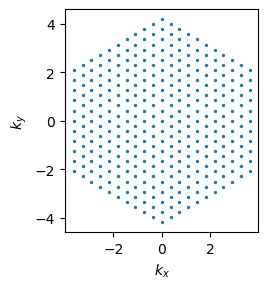

In [44]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [65]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [ ]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [68]:
h_nonint = ham.generate_non_interacting()

In [69]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

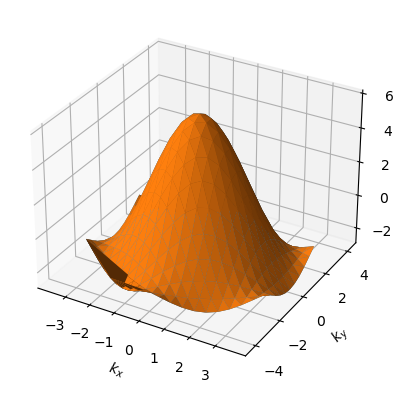

In [70]:
utils_auto.plot_2d_bandstructure(ham,en)

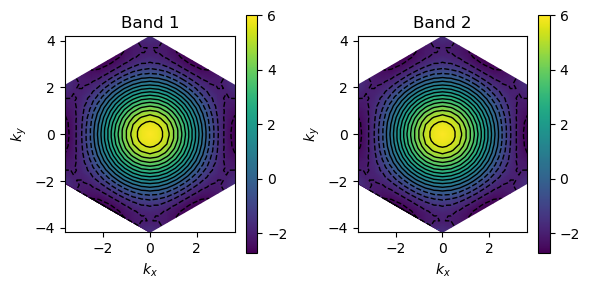

In [71]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [73]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [74]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

/mnt/d/Cornell/HartreeFock_GPT/test_coding/automation/2004_04168/code_2004_04168_5.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  n_s[s] = np.mean(exp_val[s, s, :])


Convergence reached at iteration 1


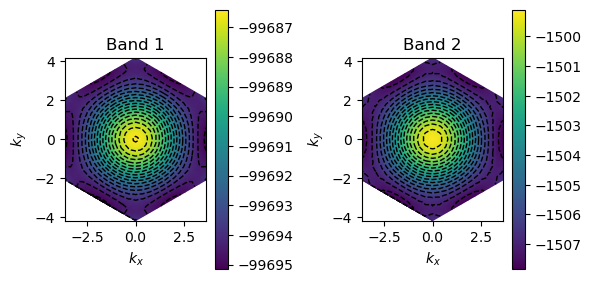

In [91]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)

In [78]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [79]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

/mnt/d/Cornell/HartreeFock_GPT/test_coding/automation/2004_04168/code_2004_04168_5.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  n_s[s] = np.mean(exp_val[s, s, :])


Convergence reached at iteration 1


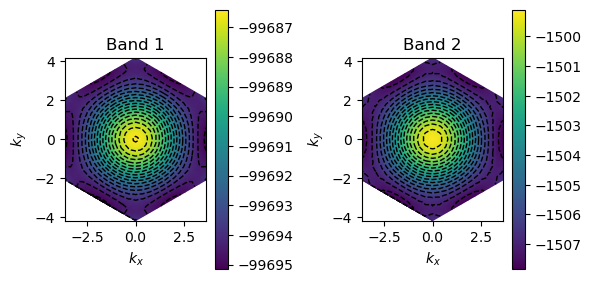

In [80]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [81]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 98178.58
U/T is 24548.43
mean_U is 24999.09


# Auto eval

## Task 1

In [ ]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md',paper=paper)
    )


#################### THINKING ####################

Let me analyze this
Let me analyze this image according to the rubric:

1. Check if the image shows a momentum space mesh in the first Brillouin zone for the problem.

The image shows a hexagonal pattern of dots in the k-space, with kx on the horizontal axis and ky on the vertical axis. The axes range from approximately -4 to 4 for both kx and ky.

For a triangular lattice, the first Brillouin zone should be a hexagon in reciprocal space. This matches what we see in the image - a hexagonal arrangement of k-points. The density of points suggests this is a mesh used for numerical calculations.

2. Check the point group symmetry.

The triangular lattice has 6-fold rotational symmetry (C6v point group). Looking at the image, I can see that the mesh of k-points forms a hexagonal pattern that preserves this symmetry. The hexagon is centered at the origin (0,0) and appears to have 6-fold rotational symmetry around this point.

The mesh poin

In [83]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [ ]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md',paper=paper)
    )


#################### THINKING ####################

I
I need to analyze the band structure plots shown in the image and determine if they match the expected symmetry for a triangular lattice. Let me go through the rubric point by point:

1. Shape of the Brillouin zone boundary for a triangular lattice:
   - A triangular lattice should have a hexagonal first Brillouin zone.
   - Looking at the image, I can see that both Band 1 and Band 2 plots show a hexagonal boundary, which is correct for a triangular lattice.

2. Symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   - In both bands, the highest energy region (yellow) is at the center of the Brillouin zone (at k_x = 0, k_y = 0).
   
   2.2 Pattern of energy variation:
   - The energy decreases radially outward from the center in concentric patterns.
   - The contour lines form nearly perfect circles near the center and become more hexagonal as they approach the zone boundary.
   
   2.3 Rotational symmetrie

In [85]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [ ]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md',paper=paper)
    )


#################### THINKING ####################

Let me analyze
Let me analyze the image according to the rubric:

1. First, I need to identify the shape of the Brillouin zone boundary:
   - Looking at the plots, I can see hexagonal boundaries, which is indeed the expected shape for a Brillouin zone of a triangular lattice. This matches what's expected.

2. Examining the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow): 
       - In both Band 1 and Band 2, the highest energy (yellow) regions are at the center of the Brillouin zone (k_x = 0, k_y = 0).
   
   2.2 Pattern of energy variation:
       - Energy decreases radially outward from the center in concentric, approximately circular patterns.
       - The energy contours form hexagonal patterns that align with the Brillouin zone boundary.
   
   2.3 Rotational symmetries:
       - The energy pattern appears to have 6-fold rotational symmetry (60-degree rotations).
       - The pattern is symmetric under

In [93]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [ ]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md',paper=paper,U_int=1e5)
    )


#################### THINKING ####################

Let's analyze the
Let's analyze the image based on the rubric provided.

First, let's identify what the image is showing:
- There are two hexagonal plots labeled "Band 1" and "Band 2"
- Both show false color plots of energy bands in k-space (momentum space)
- The hexagonal shape represents the first Brillouin zone
- The color scale indicates energy values (with yellow being higher energy and purple being lower energy)

Now I'll go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.
   - The Brillouin zone boundary in the image is hexagonal, which is indeed correct for a triangular lattice. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

   2.1 Identify the highest energy regions (yellow)
   - In both bands, the highest energy region (yellow) is at the center o

In [89]:
answer4=utils_auto.extract_result_content(result4['text'])

In [94]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '5' saved to final_answer.yaml
